# Test Fish Elementary Nutrient Sector with Nitrogen Connection#

Primarily used for debugging and making sure module runs fine on its own.

In [1]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

from aquaponics import Aquaponics

In [2]:
a = Aquaponics('nutrient', 'nitrogen', HFS_0=.1, FC_0=1)
m = a.get_model()

tf = 30
steps = tf * 10 + 1
m.time = np.linspace(0, tf, steps)
m.options.IMODE = 4
m.options.SOLVER = 3

m.solve(disp=False)

Text(0.5,0,'Time (days)')

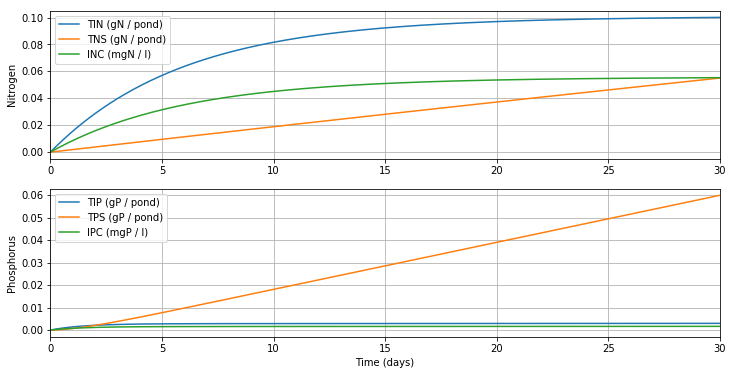

In [3]:
%matplotlib inline
plt.figure(figsize=(12,6))
plt.title('Elementary Nutrients')
ax = plt.subplot(211)
plt.plot(m.time, a.TIN, label='TIN (gN / pond)')
plt.plot(m.time, a.TNS, label='TNS (gN / pond)')
plt.plot(m.time, a.INC, label='INC (mgN / l)')
plt.grid()
plt.ylabel('Nitrogen')
plt.legend()

ax = plt.subplot(212, sharex=ax)
plt.plot(m.time, a.TIP, label='TIP (gP / pond)')
plt.plot(m.time, a.TPS, label='TPS (gP / pond)')
plt.plot(m.time, a.IPC, label='IPC (mgP / l)')
plt.grid()
plt.ylabel('Phosphorus')
plt.legend()

plt.xlim(0, tf)
plt.xlabel('Time (days)')